<a href="https://colab.research.google.com/github/ccplanet/GithupTest/blob/master/%E5%9F%BA%E6%9C%AC%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#tensorflow，keras fashion_mnist数据训练神经网络模型
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 下载并读取数据
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# 添加类别名称，以备使用
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

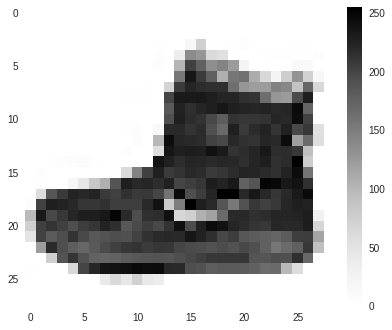

In [40]:
# 查看大小，绘图
train_images.shape,train_labels
test_images.shape,test_labels
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)


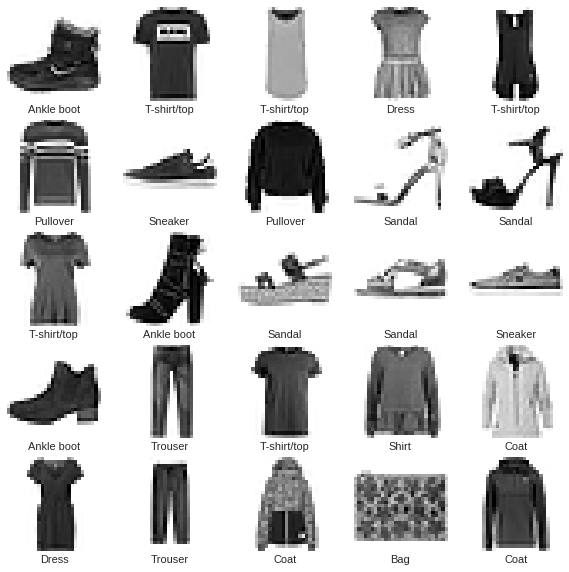

In [41]:
#归一化
train_images = train_images / 255.0
test_images = test_images / 255.0

#绘制前25张图
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
#构建模型，设置层
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #转换成一维数组
    keras.layers.Dense(128, activation=tf.nn.relu), #第一个 Dense 层具有 128 个节点
    keras.layers.Dense(10, activation=tf.nn.softmax) #第二层 softmax 层 10个节点
])


In [0]:
#设置模型参数
model.compile(optimizer=tf.train.AdamOptimizer(), #优化器 - 根据模型看到的数据及其损失函数更新模型的方式。
              loss='sparse_categorical_crossentropy', #损失函数 - 衡量模型在训练期间的准确率。我们希望尽可能缩小该函数，以“引导”模型朝着正确的方向优化。
              metrics=['accuracy']) #指标 - 用于监控训练和测试步骤。这里示例使用准确率，即图像被正确分类的比例。

In [44]:
# 训练模型
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4958 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3725 - acc: 0.8663
Epoch 3/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3370 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3137 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2968 - acc: 0.8917


In [45]:
# 评估在测试集上的准确率
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
#结果表明，模型在测试数据集上的准确率略低于在训练数据集上的准确率。训练准确率和测试准确率之间的这种差异表示出现过拟合。如果机器学习模型在新数据上的表现不如在训练数据上的表现，就表示出现过拟合。

10000/10000 [==============================] - 1s 70us/sample - loss: 0.3626 - acc: 0.8702
Test accuracy: 0.8702


In [52]:
# 做出预测
predictions = model.predict(test_images)
# 查看第一个预测
print(predictions[0])
# 查看所属最大置信度的类别
print(np.argmax(predictions[0]))
# 检查标签看是否正确
print(test_labels[0])

[6.5740792e-06 2.4093340e-06 5.2816728e-07 4.9274473e-07 2.8806306e-07
 5.7558119e-02 2.6400733e-06 1.9786293e-02 2.0083462e-05 9.2262256e-01]
5
7


In [0]:
# 将预测绘制成图查看的方法
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

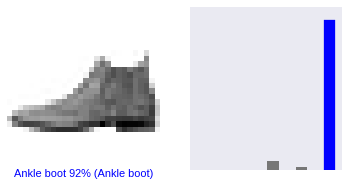

In [53]:
# 查看第0张图的绘制结果
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

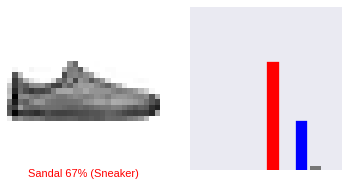

In [49]:
# 我们用它们的预测绘制几张图像。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。请注意，即使置信度非常高，也有可能预测错误。
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
# 可以看出第12张图预测错误

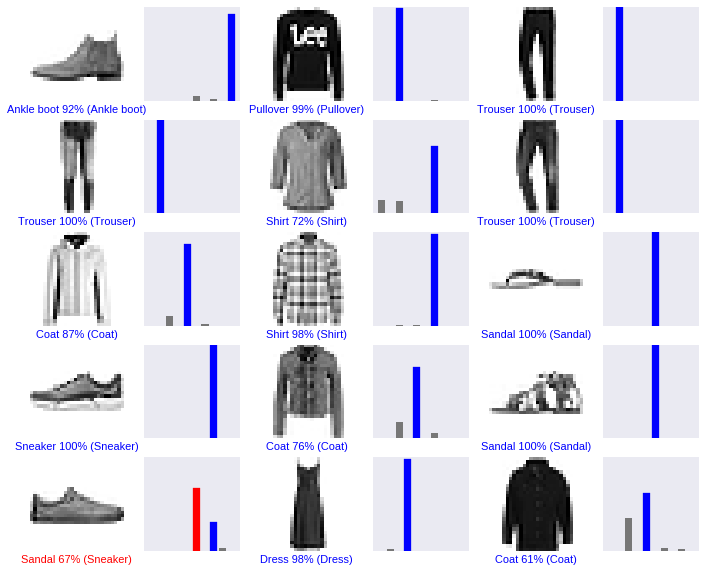

In [54]:
# 预测多个对比
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

(28, 28)
(1, 28, 28)
[[6.5740605e-06 2.4093385e-06 5.2816671e-07 4.9274519e-07 2.8806281e-07
  5.7558089e-02 2.6400683e-06 1.9786287e-02 2.0083442e-05 9.2262256e-01]]


9

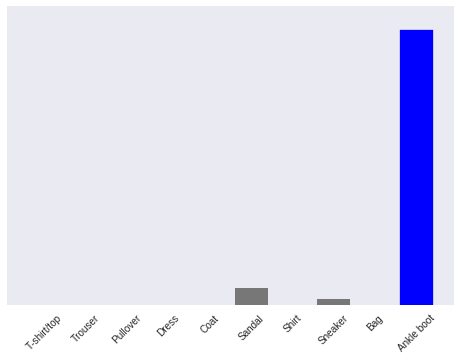

In [57]:
# 预测一张图
# Grab an image from the test dataset
# tf.keras 模型已经过优化，可以一次性对样本批次或样本集进行预测。因此，即使我们使用单个图像，仍需要将其添加到列表中：
img = test_images[0]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)
# model.predict 返回一组列表，每个列表对应批次数据中的每张图像。（仅）获取批次数据中相应图像的预测结果：
predictions_single = model.predict(img)
print(predictions_single)
# 绘图
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])